<a href="https://colab.research.google.com/github/Sh-Dulguun/Dulguun.github.io/blob/master/Credit_information_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()


# check function of missing value
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# **[Question 1] Understanding the content of the competition**

1. What kind of company is Home Credit?
##### The Home Credit company lends to people. The problem they're facing is guessing the repayment capabilities of their communicators.
2. What is expected in this competition?
##### Get a program to make the right predict using Kaggler data.
3. What are the benefits companies can gain by predicting this?
##### We predicted that Kaggler would lend to the right person. and preventing lending to someone who is unable to repay.

# **[Problem 2] Understanding the overview of the data**

#### 2.1 Use .head() , .info() , describe() , etc.​ ​

In [ ]:
app_train = pd.read_csv('application_train.csv')
print(app_train.info())
print('application train head is: {}'.format(app_train.head(5)))
print('application train describe is: {}'.format(app_train.describe()))
print('application_train shape is: {}'.format(app_train.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9692 entries, 0 to 9691
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 9.0+ MB
None
application train head is:    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0        

#### 2.2 Check for missing values

In [ ]:
missing_info = missing_data(app_train)
print(missing_info)

                            Total    Percent
COMMONAREA_MODE              6755  69.696657
COMMONAREA_AVG               6755  69.696657
COMMONAREA_MEDI              6755  69.696657
NONLIVINGAPARTMENTS_MODE     6720  69.335534
NONLIVINGAPARTMENTS_AVG      6720  69.335534
...                           ...        ...
NAME_FAMILY_STATUS              0   0.000000
NAME_HOUSING_TYPE               0   0.000000
REGION_POPULATION_RELATIVE      0   0.000000
TARGET                          0   0.000000
SK_ID_CURR                      0   0.000000

[122 rows x 2 columns]


#### 2.3 Draw a graph showing the percentage of classes

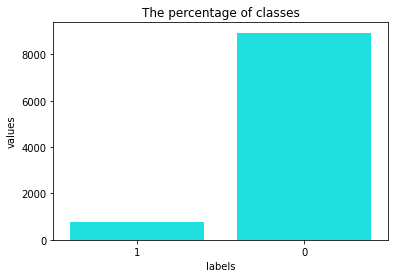

From the barplot of target, this dataset is unbalanced dataset


In [ ]:
temp = app_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

plt.title('The percentage of classes')
sns.barplot(x = 'labels', y="values", data=df, order = [1,0], color='cyan')
plt.show()

print('From the barplot of target, this dataset is unbalanced dataset')

# **[Problem 3] Defining issues**
Please set multiple issues / questions of your own based on the overview of the data.

1. Dataset is an unbalanced
2. Almost half of feature has missing values about 50 percent
3. Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. In terms of percentage of not repayment of loan, lower secondarty has the highest percent of not repayment (10%), with academic the lowest.
4. Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant. The applicants with the type of income Maternity leave have almost (40%) ratio of not returning loans, followed by Unemployed (37%).
5. Most of applicants for loans are income from Working, and the type of income Maternity leave and Unemployed have almost (77%) ratio of not returning loans

# **[Problem 4] Data exploration**
Proceed with data exploration to solve the issues and questions set in Problem 3. Create at least 5 tables and graphs to use in your exploration along with your thoughts .

If you have any new questions during the exploration process, please add them to the answer to Problem 3.

1. Dataset is an unbalanced        2. Almost half of feature has missing values about 50 percent         3. Majority of the clients have Secondary / secondary special education, followed by clients with Higher education.             In terms of percentage of not repayment of loan, lower secondarty has the highest percent of not repayment (10%), with academic the lowest.        4. Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.            The applicants with the type of income Maternity leave have almost (40%) ratio of not returning loans, followed by Unemployed (37%).         5. Most of applicants for loans are income from Working, and the type of income Maternity leave and Unemployed have almost (77%) ratio of not returning loans


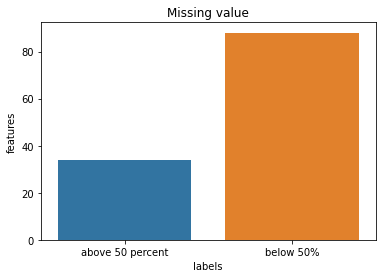

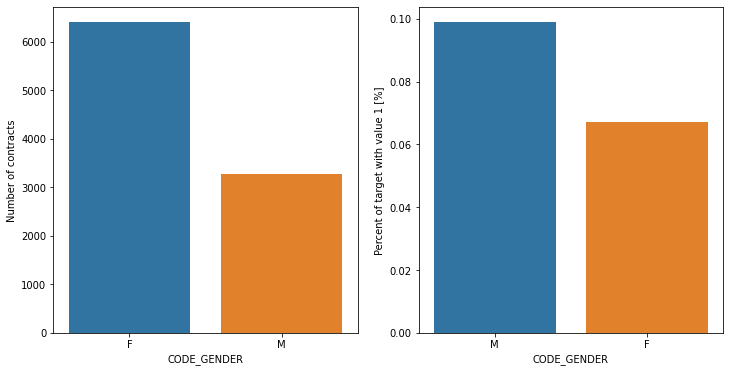

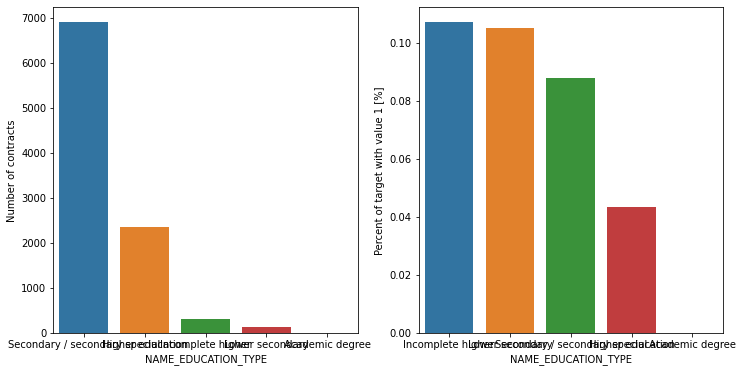

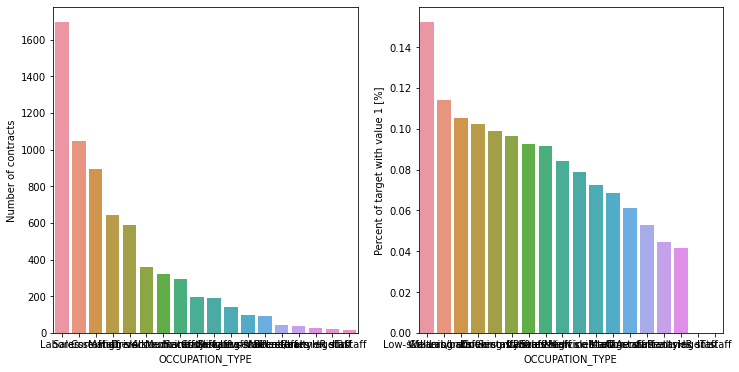

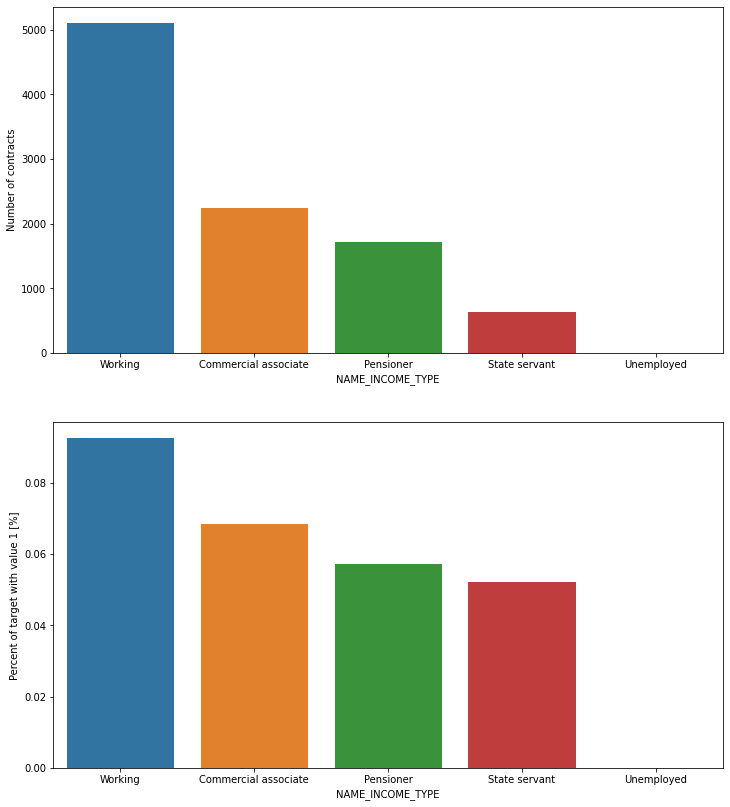

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


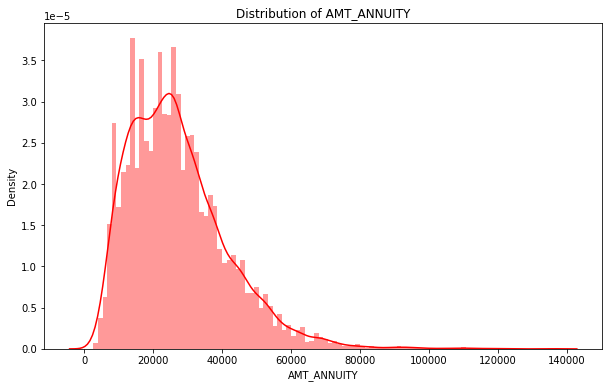

In [ ]:
j=0
for i in range (len(missing_info)):
    if missing_info.iloc[i,1] > 50:
        j = j + 1

df = pd.DataFrame({'labels': ['above 50 percent', 'below 50%'],
                   'features': [j, len(missing_info)-j]
                  })
plt.title('Missing value')
sns.barplot(x = 'labels', y="features", data=df)
plt.show()

# 3. some stats
plot_stats('CODE_GENDER')
plot_stats('NAME_EDUCATION_TYPE')
plot_stats('OCCUPATION_TYPE')
plot_stats('NAME_INCOME_TYPE',False,False)
plot_distribution('AMT_ANNUITY', 'red')